In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
import polars as pl
from geomeppy import IDF
from eppy.bunch_subclass import EpBunch


from case_edits.ezcase import create_ezcase
from helpers.variable_interfaces import all_variables as vars

from analysis.plot_subsurfaces import plot_surfaces
from analysis.plot_helpers import plot_zone_domains


from setup.materials_setup import retrieve_cases

In [5]:
all_cases = retrieve_cases()
case = [i for i in all_cases if "red" in i.case_name][1]
case

CaseData(case_name='Medium_case_red_b1', idf=<geomeppy.idf.IDF object at 0x1335842e0>, sql=Energy SQLiteResult: /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Medium_case_red_b1/results/eplusout.sql, path_to_input=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/outputs2/case_red_b1'), path_to_output=PosixPath('/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Medium_case_red_b1'))

In [25]:
case2 = create_ezcase(case.path_to_output, case.path_to_input)
# case2.run_idf()
# doors = [i for i in  case2.idf.idfobjects]

No epw! Now its EPW file Data for ["PALO-ALTO-AP"]
Partner Block 00 Storey 0 not in  original AFN. Adding now.. 
Subsurf Block 00 Storey 0 Wall 0002 Window not in  original AFN. Adding now.. 
out.idf does not exist


In [26]:
case2.run_idf()

idf has changed - running case

/Applications/EnergyPlus-22-2-0/energyplus --weather /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/weather_data/PALO_ALTO/CA_PALO-ALTO-AP_724937_23.EPW --output-directory /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/material_exp/Medium_case_red_b1/results --idd /Applications/EnergyPlus-22-2-0/Energy+.idd /Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/cases/base/01example/Minimal_AP_b84d61.idf

EnergyPlus Starting
EnergyPlus, Version 22.2.0-c249759bad, YMD=2024.11.19 13:59
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Starting Simulation at 07/01/2017 for SUMMER
Writing tabular output file results using HTML format.
Writing final SQL reports
EnergyPlus Run Time=00hr 00min  0.44sec


EnergyPlus Completed Successfully.


In [7]:
[i.Surface_Name for i in case2.idf.idfobjects["AIRFLOWNETWORK:MULTIZONE:SURFACE"]]

['Block 08 Storey 0 Wall 0002_2 Door',
 'Block 03 Storey 0 Wall 0004 Window',
 'Block 05 Storey 0 Wall 0002_1 Door',
 'Block 04 Storey 0 Wall 0001_1 Door',
 'Block 05 Storey 0 Wall 0004 Window',
 'Block 08 Storey 0 Wall 0002_3 Door',
 'Block 09 Storey 0 Wall 0003 Window',
 'Block 09 Storey 0 Wall 0004 Window',
 'Block 02 Storey 0 Wall 0002 Window',
 'Block 01 Storey 0 Wall 0002 Window',
 'Block 03 Storey 0 Wall 0001 Window',
 'Block 04 Storey 0 Wall 0004 Window',
 'Block 02 Storey 0 Wall 0001 Window',
 'Block 03 Storey 0 Wall 0002_2 Door',
 'Block 09 Storey 0 Wall 0001_2',
 'Block 09 Storey 0 Wall 0002_1',
 'Block 08 Storey 0 Wall 0002_1',
 'Block 00 Storey 0 Wall 0002 Window']

In [15]:
[i.Name for i in case2.idf.idfobjects["AirflowNetwork:MultiZone:Component:SimpleOpening".upper()]]

['Block 08 Storey 0 Wall 0002_2 Door SimpleOpening',
 'Block 03 Storey 0 Wall 0004 Window SimpleOpening',
 'Block 05 Storey 0 Wall 0002_1 Door SimpleOpening',
 'Block 04 Storey 0 Wall 0001_1 Door SimpleOpening',
 'Block 05 Storey 0 Wall 0004 Window SimpleOpening',
 'Block 08 Storey 0 Wall 0002_3 Door SimpleOpening',
 'Block 09 Storey 0 Wall 0003 Window SimpleOpening',
 'Block 09 Storey 0 Wall 0004 Window SimpleOpening',
 'Block 02 Storey 0 Wall 0002 Window SimpleOpening',
 'Block 01 Storey 0 Wall 0002 Window SimpleOpening',
 'Block 03 Storey 0 Wall 0001 Window SimpleOpening',
 'Block 04 Storey 0 Wall 0004 Window SimpleOpening',
 'Block 02 Storey 0 Wall 0001 Window SimpleOpening',
 'Block 03 Storey 0 Wall 0002_2 Door SimpleOpening',
 'Block 09 Storey 0 Wall 0001_2 SimpleOpening',
 'Block 09 Storey 0 Wall 0002_1 SimpleOpening',
 'Block 08 Storey 0 Wall 0002_1 SimpleOpening',
 'Block 00 Storey 0 Wall 0002 Window SimpleOpening']

In [8]:
from setup.interfaces import CaseData

case2_data = CaseData(case.case_name, case2.idf, case.sql, case.path_to_input, case.path_to_output)

Block 06 Storey 0 Wall 0002_1 Door NOT IN AFN.. 
AirBoundary Block 09 Storey 0 Wall 0001_2 NOT IN AFN.. 
AirBoundary Block 09 Storey 0 Wall 0002_1 NOT IN AFN.. 
AirBoundary Block 08 Storey 0 Wall 0002_1 NOT IN AFN.. 


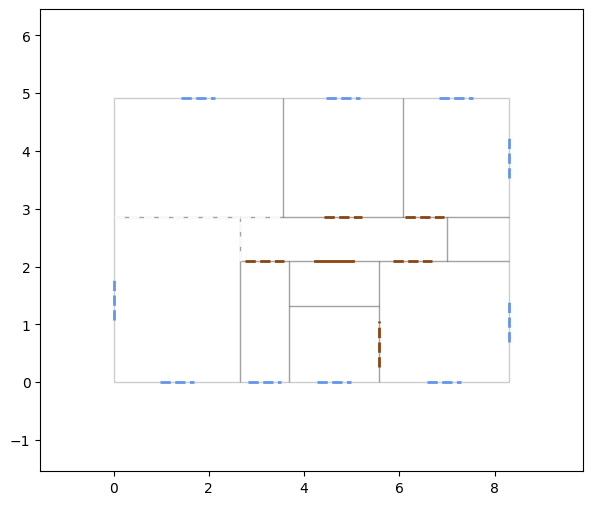

In [27]:
time = datetime(2017, 7, 1, 8, 15)
fig, ax = plt.subplots(nrows=1, figsize=(7, 6))
ax = plot_zone_domains(case2.idf, ax)
ax, data = plot_surfaces(case2_data, time, ax)

In [17]:
[i.Name for i in case2_data.idf.idfobjects["AirflowNetwork:MultiZone:Component:SimpleOpening".upper()]]

['Block 08 Storey 0 Wall 0002_2 Door SimpleOpening',
 'Block 03 Storey 0 Wall 0004 Window SimpleOpening',
 'Block 05 Storey 0 Wall 0002_1 Door SimpleOpening',
 'Block 04 Storey 0 Wall 0001_1 Door SimpleOpening',
 'Block 05 Storey 0 Wall 0004 Window SimpleOpening',
 'Block 08 Storey 0 Wall 0002_3 Door SimpleOpening',
 'Block 09 Storey 0 Wall 0003 Window SimpleOpening',
 'Block 09 Storey 0 Wall 0004 Window SimpleOpening',
 'Block 02 Storey 0 Wall 0002 Window SimpleOpening',
 'Block 01 Storey 0 Wall 0002 Window SimpleOpening',
 'Block 03 Storey 0 Wall 0001 Window SimpleOpening',
 'Block 04 Storey 0 Wall 0004 Window SimpleOpening',
 'Block 02 Storey 0 Wall 0001 Window SimpleOpening',
 'Block 03 Storey 0 Wall 0002_2 Door SimpleOpening',
 'Block 09 Storey 0 Wall 0001_2 SimpleOpening',
 'Block 09 Storey 0 Wall 0002_1 SimpleOpening',
 'Block 08 Storey 0 Wall 0002_1 SimpleOpening',
 'Block 00 Storey 0 Wall 0002 Window SimpleOpening']

Block 06 Storey 0 Wall 0002_1 Door NOT IN AFN.. 
Block 00 Storey 0 Wall 0002 Window NOT IN AFN.. 
AirBoundary Block 09 Storey 0 Wall 0001_2 NOT IN AFN.. 
AirBoundary Block 09 Storey 0 Wall 0002_1 NOT IN AFN.. 
AirBoundary Block 08 Storey 0 Wall 0002_1 NOT IN AFN.. 


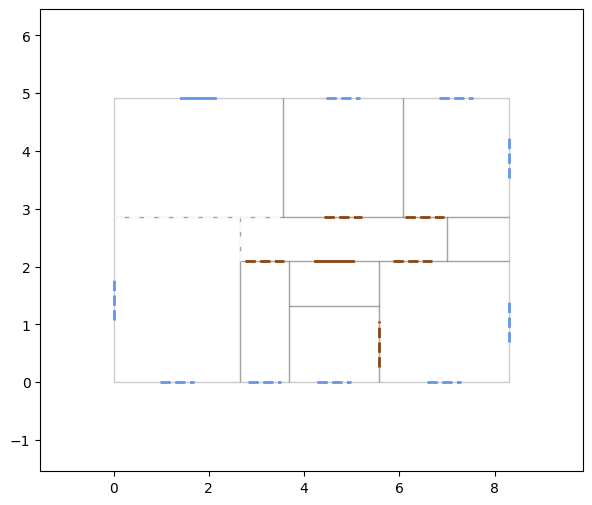

In [12]:
time = datetime(2017, 7, 1, 8, 15)
fig, ax = plt.subplots(nrows=1, figsize=(7, 6))
ax = plot_zone_domains(case.idf, ax)
ax, data = plot_surfaces(case, time, ax)